In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=10, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-07-18 18:50:32.051860: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-d589b091-a512-4caa-9b65-8e9bed74ebf1.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.53559528 0.11774429 0.83529998]),
                           Object(name=can0, pos=[ 0.64783705 -0.22660323  0.85059666]),
                           Object(name=cereal0, pos=[0.59437074 0.00975296 0.88526188])]}),
             ('panda_gripper', {'holding': None})])
***************************************************************

*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Obj

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
        use_pick_action=False,
    )
mcts.only_optimize_1 = False

2023-07-18 18:50:33.852956: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-18 18:50:33.902055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-18 18:50:33.902124: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-07-18 18:50:33.902147: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-18 18:50:33.903671: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-18 18:50:33.903730: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-07-18 18:50:36.142288: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 18:50:36.143025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-18 18:50:36.143131: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-07-18 18:50:36.143227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-07-18 18:50:36.823370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-07-18 18:50:36.823392: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-07-18 18:50:36.823396: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-07-18 18:50:36.823558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-18 18:50:36.823688: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-18 18:50:36.823746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [3]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 7
=========== Search iteration : 1 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(7) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(7) -> A(10) -> S'(12) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(12) -> A(16) -> S'(17) Reward : 2.5
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(17) -> A(18) -> S'(22) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(22) -> A(23) -> S'(26) Reward : -4.0
[Action] Rearr cereal0
Good Action
[Reward] S(26) -> A(30) -> S'(31) Reward : 1.429
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(31) -> A(32) -> S'(36) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(36) -> A(37) -> S'(40) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(40) -> A(41) -> S'(43) Reward : 1.0
[Action] Rearr can0
placed another place not goal
[Reward] S(43) -> A(44) -> S'(47)

2023-07-18 18:50:40.531197: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-07-18 18:50:41.256890: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-07-18 18:50:42.198972: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-18 18:50:43.003898: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-07-18 18:50:43.953715: W tensorflow/core/common_runtime/bfc_allocator.cc:337] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact.

Generated 134 grasps for object cereal0
Generated Grasp in world coord : (134, 4, 4)
Collision free grasps step 1 :  (108, 4, 4)
can0
Extracted Region Cube Size:  0.4
Generated 32 grasps for object can0
Generated Grasp in world coord : (32, 4, 4)
Collision free grasps step 1 :  (26, 4, 4)
cereal0
Extracted Region Cube Size:  0.4
Generated 142 grasps for object cereal0
Generated Grasp in world coord : (142, 4, 4)
Collision free grasps step 1 :  (121, 4, 4)
ben_cube0
Extracted Region Cube Size:  0.4
Generated 9 grasps for object ben_cube0
Generated Grasp in world coord : (9, 4, 4)
Collision free grasps step 1 :  (0,)
Augment 1 _z axis 90' rotation  (9, 4, 4) (9, 4, 4)
Collision free grasps step 2 :  (7, 4, 4)
can0
Extracted Region Cube Size:  0.4
Generated 188 grasps for object can0
Generated Grasp in world coord : (188, 4, 4)
Collision free grasps step 1 :  (160, 4, 4)
cereal0
Extracted Region Cube Size:  0.4
Generated 131 grasps for object cereal0
Generated Grasp in world coord : (131,

KeyError: None

In [ ]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

In [ ]:
max_value_nodes

In [ ]:
for i in mcts.history_level_1_dict[3]['nodes']:
    if not mcts.tree.nodes[i]['level1_5']:
        print("Error")

In [ ]:
mcts.tree.nodes[6]

In [ ]:
mcts.tree.nodes[195]

In [21]:
from pytamp.search.node_data import NodeData

action = mcts.tree.nodes[195].get(NodeData.ACTION)
'grasp' in list(action.keys())

True

In [36]:
from pytamp.search.node_data import NodeData

visited_nodes = [
                True for n in max_value_nodes if mcts.tree.nodes[n][NodeData.LEVEL1_5] is True
            ]
# visited_nodes.append(False)
all(visited_nodes)

True

In [ ]:
# mcts._level_wise_between_1_and_2_optimize(max_value_nodes)

In [43]:
# import random
# from copy import deepcopy
# from pykin.utils.kin_utils import ShellColors as sc

# def get_grasp_action_using_contact_graspnet(success_level_1_sub_nodes):
#     node_length = int(len(success_level_1_sub_nodes)/2)
#     for i in range(node_length):
#         current_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 1]]
#         next_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 2]]
#         obj_to_manipulate =current_node['action']['rearr_obj_name']
        
#         print(f"{sc.COLOR_BROWN}{obj_to_manipulate}{sc.ENDC}")
#         for _ in range(2):
#             grasps = mcts.grasp_generator.get_grasp(
#                 init_scene = rearrangement1.init_scene,
#                 next_node = next_node,
#                 current_node = current_node,
#                 )
#             if len(grasps)>=1:
#                 grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)
#                 current_node[mcts.rearr_action.info.GRASP_POSES] = grasp_poses_not_collision
#                 break
#         g_ = random.sample(grasp_poses_not_collision,1)
#         next_node['action'].update(deepcopy(g_[0]))
        

In [44]:
# get_grasp_action_using_contact_graspnet(max_value_nodes)

cereal0
Extracted Region Cube Size:  0.4
Generated 159 grasps for object cereal0
Generated Grasp in world coord : (159, 4, 4)
Collision free grasps step 1 :  (115, 4, 4)
ben_cube0
Extracted Region Cube Size:  0.4
Generated 21 grasps for object ben_cube0
Generated Grasp in world coord : (21, 4, 4)
Collision free grasps step 1 :  (0,)
Augment 1 _z axis 90' rotation  (21, 4, 4) (21, 4, 4)
Collision free grasps step 2 :  (0,)
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (126, 4, 4)
Collision free grasps step 3 :  (17, 4, 4)
can0
Extracted Region Cube Size:  0.4
Generated 81 grasps for object can0
Generated Grasp in world coord : (81, 4, 4)
Collision free grasps step 1 :  (73, 4, 4)


In [29]:
# node_length = int(len(max_value_nodes)/2)
# node_length

# for i in range(node_length):
#     success_level_1_sub_nodes = max_value_nodes

#     current_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 1]]
#     next_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 2]]
#     obj_to_manipulate =current_node['action']['rearr_obj_name']
    
#     print(obj_to_manipulate)
#     for _ in range(2):
#         grasps = mcts.grasp_generator.get_grasp(
#             init_scene = rearrangement1.init_scene,
#             next_node = next_node,
#             current_node = current_node,
#             )
#         if len(grasps)>=1:
#             grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)
#             current_node[mcts.rearr_action.info.GRASP_POSES] = grasp_poses_not_collision
#             break
            
#     g_ = random.sample(grasp_poses_not_collision,1)
#     next_node['action'].update(deepcopy(g_[0]))

cereal0
Extracted Region Cube Size:  0.4
Generated 156 grasps for object cereal0
Generated Grasp in world coord : (156, 4, 4)
Collision free grasps step 1 :  (116, 4, 4)
ben_cube0
Extracted Region Cube Size:  0.4
Generated 4 grasps for object ben_cube0
Generated Grasp in world coord : (4, 4, 4)
Collision free grasps step 1 :  (0,)
Augment 1 _z axis 90' rotation  (4, 4, 4) (4, 4, 4)
Collision free grasps step 2 :  (0,)
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (24, 4, 4)
Collision free grasps step 3 :  (4, 4, 4)
can0
Extracted Region Cube Size:  0.4
Generated 134 grasps for object can0
Generated Grasp in world coord : (134, 4, 4)
Collision free grasps step 1 :  (107, 4, 4)


In [16]:
i = 2
current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]

In [17]:
current_node['state'].objs['can0'].h_mat

array([[ 0.62290299,  0.78229909,  0.        ,  0.64783705],
       [-0.78229909,  0.62290299,  0.        , -0.22660323],
       [ 0.        ,  0.        ,  1.        ,  0.85059666],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [18]:
next_node['state'].objs['can0'].h_mat

array([[-0.20671508,  0.97840118,  0.        ,  0.58836741],
       [-0.97840118, -0.20671508,  0.        ,  0.27068778],
       [ 0.        ,  0.        ,  1.        ,  0.85059666],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

{'grasp': array([[-0.99661827,  0.08016982,  0.01802237,  0.65041571],
       [ 0.08011892,  0.99677908, -0.00353011, -0.22813675],
       [-0.0182473 , -0.00207418, -0.99983133,  0.98160718],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'pre_grasp': array([[-0.9966183 ,  0.08016982,  0.01802237,  0.64861345],
       [ 0.08011892,  0.9967791 , -0.00353011, -0.22778374],
       [-0.0182473 , -0.00207418, -0.9998313 ,  1.0815903 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_grasp': array([[-0.9966183 ,  0.08016982,  0.01802237,  0.6504157 ],
       [ 0.08011892,  0.9967791 , -0.00353011, -0.22813675],
       [-0.0182473 , -0.00207418, -0.9998313 ,  1.0816072 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}
{'grasp': array([[-0.85476411,  0.50344304,  0.12618814,  0.63636042],
       [ 0.47788331,  0.85826552, -0.18710381, -0.20925424],
       [-0.20249905, -0.0996264 , -0.97420156,  0.9

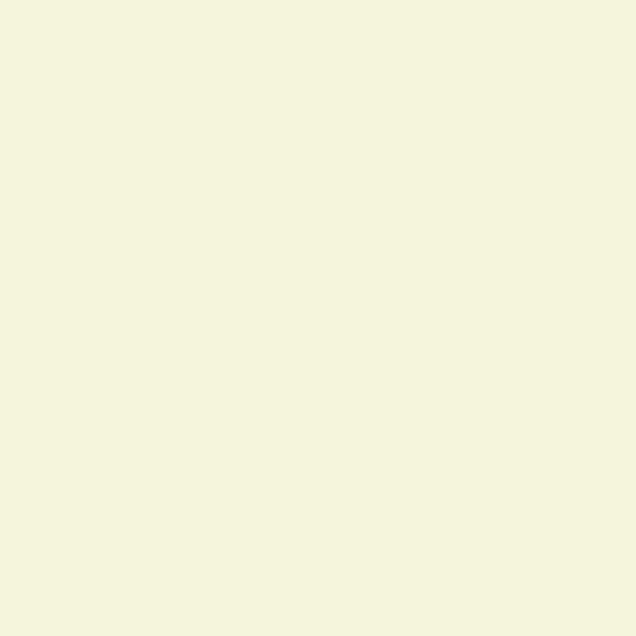

In [19]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")

for grasps in current_node['grasp_poses']:
    for i,o in current_node['state'].objs.items():
        mcts.rearr_action.scene_mngr.set_object_pose(i,o.h_mat)
    print(grasps)
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasps['grasp'])
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_axis(ax, grasps['grasp'])
    mcts.rearr_action.scene_mngr.render_axis(ax, grasps['pre_grasp'])
    mcts.rearr_action.scene_mngr.render_axis(ax, grasps['post_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [33]:
next_node['state'].objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.39377654 -0.05920111  0.83529998]),
 'can0': Object(name=can0, pos=[0.58836741 0.27068778 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[0.40992969 0.07529909 0.88526188])}